EDA - Analisis Exploratorio de Datos
A partir del archivo exportado, luego de haber confecionado el ETL, vamos a efectuar el EDA. El objetivo es prepara la base de datos para luego poder hacer el modelo de Machine Learning. 

In [66]:
#Importamos librerias que utilizaremos en el analisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

Tenemos que cargar la base de datos y vizualizarla para darnos una idea de toda la informacion que poseemos. A partir de ello debemos seleccionar la parte con la que vamos a trabajar. 

In [124]:
#Cargamos la base de datos y la vizualizamos 
movies_db = pd.read_csv("Bases de Datos/movies_db_ETL.cvs")
movies_db.head()

/var/folders/0_/ltv0fj2j4f5952b1hlmhyj_00000gn/T/ipykernel_14443/1505518684.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_db = pd.read_csv("Bases de Datos/movies_db_ETL.cvs")


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return,day,month
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,81.0,['English'],Released,NaN,Toy Story,7.7,1995,12.451801,Monday,October
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995,4.043035,Friday,December
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.7129,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995,NaN,Friday,December
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,...,127.0,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995,5.090760,Friday,December
4,Father of the Bride Collection,0.0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,...,106.0,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995,inf,Friday,February


In [68]:
#Vemos informacion general del dataframe (Cantidad de columnas, tipos de datos, nulos, etc)
movies_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45366 entries, 0 to 45365
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   budget                 45366 non-null  float64
 2   genres                 45366 non-null  object 
 3   id                     45366 non-null  object 
 4   original_language      45355 non-null  object 
 5   overview               44425 non-null  object 
 6   popularity             45364 non-null  object 
 7   production_companies   45366 non-null  object 
 8   production_countries   45366 non-null  object 
 9   release_date           45363 non-null  object 
 10  revenue                45366 non-null  float64
 11  runtime                45117 non-null  float64
 12  spoken_languages       45366 non-null  object 
 13  status                 45283 non-null  object 
 14  tagline                20394 non-null  object 
 15  ti

In [69]:
#Eliminamos Columnas que no utilizaremos posteriormente (Debemos recordar las consultas de la consigna pasada)
movies_db.drop(["id", "overview", "popularity", "release_date", "tagline", "runtime", "vote_average"], axis=1, inplace=True )

In [70]:
#Visualizamos
movies_db.head()

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,spoken_languages,status,title,release_year,return,day,month
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",en,['Pixar Animation Studios'],['United States of America'],373554033.0,['English'],Released,Toy Story,1995,12.451801,Monday,October
1,NaN,65000000.0,"['Adventure', 'Fantasy', 'Family']",en,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],262797249.0,"['English', 'Français']",Released,Jumanji,1995,4.043035,Friday,December
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",en,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],0.0,['English'],Released,Grumpier Old Men,1995,NaN,Friday,December
3,NaN,16000000.0,"['Comedy', 'Drama', 'Romance']",en,['Twentieth Century Fox Film Corporation'],['United States of America'],81452156.0,['English'],Released,Waiting to Exhale,1995,5.090760,Friday,December
4,Father of the Bride Collection,0.0,['Comedy'],en,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],76578911.0,['English'],Released,Father of the Bride Part II,1995,inf,Friday,February


In [71]:
#Cambiaremos los tipos de datos
movies_db["belongs_to_collection"] = movies_db["belongs_to_collection"].astype("category")
movies_db["genres"] = movies_db["genres"].astype("category")
movies_db["original_language"] = movies_db["original_language"].astype("category")
movies_db["production_companies"] = movies_db["production_companies"].astype("category")
movies_db["production_countries"] = movies_db["production_countries"].astype("category")
movies_db["spoken_languages"] = movies_db["spoken_languages"].astype("category")
movies_db["status"] = movies_db["status"].astype("category")
movies_db["title"] = movies_db["title"].astype("category")
movies_db["day"] = movies_db["day"].astype("category")
movies_db["month"] = movies_db["month"].astype("category")

In [72]:
#Corroboramos los tipos de datos
movies_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45366 entries, 0 to 45365
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   belongs_to_collection  4488 non-null   category
 1   budget                 45366 non-null  float64 
 2   genres                 45366 non-null  category
 3   original_language      45355 non-null  category
 4   production_companies   45366 non-null  category
 5   production_countries   45366 non-null  category
 6   revenue                45366 non-null  float64 
 7   spoken_languages       45366 non-null  category
 8   status                 45283 non-null  category
 9   title                  45363 non-null  category
 10  release_year           45366 non-null  int64   
 11  return                 10909 non-null  float64 
 12  day                    45363 non-null  category
 13  month                  45363 non-null  category
dtypes: category(10), float64(3), int64(1)


Debemos ver que datos hay en cada columna, ya que deben ser todos correctos para que el modelo funcione como corresponde. (Solo las columnas que utilizaremos para el modelo de ML)

In [73]:
#Chequeamos los datos de cada columna
pd.Categorical(movies_db["belongs_to_collection"])

['Toy Story Collection', NaN, 'Grumpy Old Men Collection', NaN, 'Father of the Bride Collection', ..., NaN, NaN, NaN, NaN, NaN]
Length: 45366
Categories (1695, object): ['... Has Fallen Collection', '00 Schneider Filmreihe', '08/15 Collection', '100 Girls Collection', ..., 'Чебурашка и крокодил Гена', 'Что Творят мужчины! (Коллекция)', '男はつらいよ シリーズ', '식객 시리즈']

In [74]:
#Chequeamos los datos de cada columna
pd.Categorical(movies_db["genres"])

['['Animation', 'Comedy', 'Family']', '['Adventure', 'Fantasy', 'Family']', '['Romance', 'Comedy']', '['Comedy', 'Drama', 'Romance']', '['Comedy']', ..., '['Drama', 'Action', 'Romance']', '['Drama']', '['Action', 'Drama', 'Thriller']', '[]', '[]']
Length: 45366
Categories (4068, object): ['['Action', 'Adventure', 'Animation', 'Comedy'..., '['Action', 'Adventure', 'Animation', 'Comedy'..., '['Action', 'Adventure', 'Animation', 'Comedy'..., '['Action', 'Adventure', 'Animation', 'Comedy'..., ..., '['Western', 'War', 'History', 'Romance']', '['Western', 'War']', '['Western']', '[]']

In [75]:
#Chequeamos los datos de cada columna
pd.Categorical(movies_db["original_language"])

['en', 'en', 'en', 'en', 'en', ..., 'en', 'tl', 'en', 'en', 'en']
Length: 45366
Categories (92, object): ['104.0', '68.0', '82.0', 'ab', ..., 'wo', 'xx', 'zh', 'zu']

In [76]:
#Chequeamos los datos de cada columna
pd.Categorical(movies_db["production_companies"])

['['Pixar Animation Studios']', '['TriStar Pictures', 'Teitler Film', 'Intersc..., '['Warner Bros.', 'Lancaster Gate']', '['Twentieth Century Fox Film Corporation']', '['Sandollar Productions', 'Touchstone Picture..., ..., '['Westdeutscher Rundfunk (WDR)', 'Working Tit..., '['Sine Olivia']', '['American World Pictures']', '['Yermoliev']', '[]']
Length: 45366
Categories (22668, object): ['["'A' Production Committee"]', '["Ali'n Productions"]', '["Anarchist's Convention Films"]', '["Archer's Mark"]', ..., '['이디오플랜']', '['인벤트 디']', '['프로덕션M']', '[]']

In [77]:
#Chequeamos los datos de cada columna
pd.Categorical(movies_db["status"])

['Released', 'Released', 'Released', 'Released', 'Released', ..., 'Released', 'Released', 'Released', 'Released', 'Released']
Length: 45366
Categories (6, object): ['Canceled', 'In Production', 'Planned', 'Post Production', 'Released', 'Rumored']

In [78]:
#Chequeamos los datos de cada columna
pd.Categorical(movies_db["title"])

['Toy Story', 'Jumanji', 'Grumpier Old Men', 'Waiting to Exhale', 'Father of the Bride Part II', ..., 'Robin Hood', 'Century of Birthing', 'Betrayal', 'Satan Triumphant', 'Queerama']
Length: 45366
Categories (42196, object): ['!Women Art Revolution', '#1 Cheerleader Camp', '#Horror', '#chicagoGirl', ..., '‘Rameau’s Nephew’ by Diderot (Thanx to Dennis..., '’Round Midnight', '…And the Fifth Horseman Is Fear', 'ファンタスティポ']

In [79]:
#Chequeamos los datos de cada columna
pd.Categorical(movies_db["release_year"])

[1995, 1995, 1995, 1995, 1995, ..., 1991, 2011, 2003, 1917, 2017]
Length: 45366
Categories (136, int64): [0, 1874, 1878, 1883, ..., 2016, 2017, 2018, 2020]

Viendo los tipos de datos podemos sacar conclusiones. Las mas destacadas son:
. En la columna genres nos toma cada lista como un dato distinto, no lo separa por companias. 
. Vemos que en los idiomas hay datos numericos. 
. Vemos algunas anomalias en los datos de la columna "release_year".


Ahora trabajaremos con los nulos

In [80]:
movies_db.isnull().sum()

belongs_to_collection    40878
budget                       0
genres                       0
original_language           11
production_companies         0
production_countries         0
revenue                      0
spoken_languages             0
status                      83
title                        3
release_year                 0
return                   34457
day                          3
month                        3
dtype: int64

Vemos una gran cantidad de nulos en "belongs_to_collection" y en "Status" hay una cantidad que tambien podemos considerar significativa.
Vamos a ir trabajando columna a columna. (Solo las columnas de ML)

Belongs to collection
Como hay demasiados nulos como para eliminarlos, vamos a crear una nueva coleccion a cada pelicula que no posea una. Esta sera igual al nombre de la pelicula, de esta forma no dejamos afuera a ningun titulo, solamente por no tener collection. 

In [81]:
#Necesitamos que sea de tipo objeto para poder aplicar el codigo
movies_db['belongs_to_collection'] = movies_db['belongs_to_collection'].astype('object')

In [82]:
#Creamos una mascara para identificar las filas sin coleccion
BtC_nulos = movies_db["belongs_to_collection"].isnull()
BtC_nulos.head()

0    False
1     True
2    False
3     True
4    False
Name: belongs_to_collection, dtype: bool

In [83]:
#Le asignamos una nueva colleccion a dichas filas. Esta sera igual al titulo. 
movies_db.loc[BtC_nulos, "belongs_to_collection"] = movies_db.loc[BtC_nulos, "title"]

In [84]:
#Corroboramos 
movies_db.head()

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,spoken_languages,status,title,release_year,return,day,month
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",en,['Pixar Animation Studios'],['United States of America'],373554033.0,['English'],Released,Toy Story,1995,12.451801,Monday,October
1,Jumanji,65000000.0,"['Adventure', 'Fantasy', 'Family']",en,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],262797249.0,"['English', 'Français']",Released,Jumanji,1995,4.043035,Friday,December
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",en,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],0.0,['English'],Released,Grumpier Old Men,1995,NaN,Friday,December
3,Waiting to Exhale,16000000.0,"['Comedy', 'Drama', 'Romance']",en,['Twentieth Century Fox Film Corporation'],['United States of America'],81452156.0,['English'],Released,Waiting to Exhale,1995,5.090760,Friday,December
4,Father of the Bride Collection,0.0,['Comedy'],en,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],76578911.0,['English'],Released,Father of the Bride Part II,1995,inf,Friday,February


In [85]:
#Vemos nulos
movies_db["belongs_to_collection"].isnull().sum()

3

Los 3 nulos son las columnas sin titulos, posteriormente elimminaremos esos registros. 

In [86]:
#Volvemos a tipo categoria 
movies_db['belongs_to_collection'] = movies_db['belongs_to_collection'].astype('category')

Original Language 
Tiene 11 nulos. Primero vamos a observar esos 11 registros. 

In [87]:
#Observamos registros nulos. 
OL_nulos = movies_db.loc[movies_db["original_language"].isnull()]
OL_nulos.head(12)

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,spoken_languages,status,title,release_year,return,day,month
19554,Shadowing the Third Man,0.0,['Documentary'],NaN,"['StudioCanal', 'British Broadcasting Corporat...","['Austria', 'France', 'Japan', 'United Kingdom...",0.0,"['Deutsch', 'English']",Released,Shadowing the Third Man,2004,NaN,Monday,October
21574,Unfinished Sky,0.0,"['Romance', 'Drama']",NaN,"['New Holland Pictures', 'IDTV Film']",['Australia'],0.0,['English'],Released,Unfinished Sky,2007,NaN,Saturday,August
22798,13 Fighting Men,0.0,"['War', 'Western']",NaN,['Associated Producers (API)'],['United States of America'],0.0,['English'],Released,13 Fighting Men,1960,NaN,Thursday,March
32093,Lambchops,0.0,['Comedy'],NaN,"['Warner Bros.', 'The Vitaphone Corporation']",['United States of America'],0.0,['English'],Released,Lambchops,1929,NaN,Thursday,October
37345,Prince Bayaya,0.0,['Animation'],NaN,['Ceskoslovenský Státní Film'],['Czech Republic'],0.0,['Český'],Released,Prince Bayaya,1950,NaN,Thursday,January
40972,Song of Lahore,0.0,['Documentary'],NaN,[],[],0.0,"['اردو', 'English', 'ਪੰਜਾਬੀ']",Released,Song of Lahore,2015,NaN,Friday,November
41792,Annabelle Serpentine Dance,0.0,['Documentary'],NaN,['Edison Manufacturing Company'],['United States of America'],0.0,['No Language'],Released,Annabelle Serpentine Dance,1895,NaN,Monday,April
43968,Lettre d'une inconnue,0.0,['Drama'],NaN,[],['France'],0.0,['Français'],Released,Lettre d'une inconnue,2001,NaN,Monday,January
44318,Yarn,0.0,"['Animation', 'Documentary']",NaN,[],[],0.0,"['svenska', 'English', 'Íslenska']",Released,Yarn,2016,NaN,Saturday,March
44484,WiNWiN,0.0,[],NaN,[],['Austria'],0.0,"['Deutsch', 'English']",Released,WiNWiN,2016,NaN,Wednesday,January


Como son pocos casos los podemos analizar individualmente. 
A las que tengan solo un "spoken_language", le vamos a asignar ese idioma. Si tienen mas de uno, veremos el pais en el que se hicieron y decidiremos que idioma le asignamos. 

In [88]:
#Vemos que categorias existen. 
print(movies_db["original_language"].astype("category").cat.categories)

Index(['104.0', '68.0', '82.0', 'ab', 'af', 'am', 'ar', 'ay', 'bg', 'bm', 'bn',
       'bo', 'bs', 'ca', 'cn', 'cs', 'cy', 'da', 'de', 'el', 'en', 'eo', 'es',
       'et', 'eu', 'fa', 'fi', 'fr', 'fy', 'gl', 'he', 'hi', 'hr', 'hu', 'hy',
       'id', 'is', 'it', 'iu', 'ja', 'jv', 'ka', 'kk', 'kn', 'ko', 'ku', 'ky',
       'la', 'lb', 'lo', 'lt', 'lv', 'mk', 'ml', 'mn', 'mr', 'ms', 'mt', 'nb',
       'ne', 'nl', 'no', 'pa', 'pl', 'ps', 'pt', 'qu', 'ro', 'ru', 'rw', 'sh',
       'si', 'sk', 'sl', 'sm', 'sq', 'sr', 'sv', 'ta', 'te', 'tg', 'th', 'tl',
       'tr', 'uk', 'ur', 'uz', 'vi', 'wo', 'xx', 'zh', 'zu'],
      dtype='object')


Remplazamos segun nos idica wikipedia. 

In [89]:
#Remplazamos por los valores correspondientes
movies_db.loc[[21574, 22798, 32093, 41792], "original_language"] = "en"

In [90]:
movies_db.loc[[43968, 44563], "original_language"] = "fr"

In [91]:
movies_db.loc[[19554, 44484], "original_language"] = "nl"

In [92]:
movies_db.loc[[37345], "original_language"] = "cs"

In [93]:
movies_db.loc[[44318], "original_language"] = "sv"

In [94]:
movies_db.loc[[40972], "original_language"] = "ur"

In [95]:
#Corroboramos que no haya mas nulos
OL_nulos = movies_db.loc[movies_db["original_language"].isnull()]
OL_nulos.head(12)

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,spoken_languages,status,title,release_year,return,day,month


Eliminamos las columnas "production_companies" y "spoken_languages", ya que no las necesitamos mas.

In [96]:
#Eliminamos columnas "production_companies" y "spoken_languages"
movies_db.drop(["spoken_languages"], axis=1, inplace=True )

Hay 3 registros numericos, vemos que paso ahi. 

In [97]:
#Buscamos los registros
movies_db[(movies_db["original_language"] == "104.0") | (movies_db["original_language"] == "68.0") | (movies_db["original_language"] == "82.0")]

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,status,title,release_year,return,day,month
19709,NaN,0.0,"['Carousel Productions', 'Vision View Entertai...",104.0,[],[],0.0,NaN,NaN,0,NaN,NaN,NaN
29460,NaN,0.0,"['Aniplex', 'GoHands', 'BROSTA TV', 'Mardock S...",68.0,[],[],0.0,NaN,NaN,0,NaN,NaN,NaN
35531,NaN,0.0,"['Odyssey Media', 'Pulser Productions', 'Rogue...",82.0,[],[],0.0,NaN,NaN,0,NaN,NaN,NaN


Vemos que coinciden con los 3 registros sin titulo. Los vamos a eliminar para evitar probelmas. 

In [98]:
#Borramos los registros con falta de datos.
movies_db.drop([19709, 29460, 35531], inplace=True)

In [99]:
#Corroboramos si siguen estando dichos registros
movies_db[(movies_db["original_language"] == "104.0") | (movies_db["original_language"] == "68.0") | (movies_db["original_language"] == "82.0")]

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,status,title,release_year,return,day,month


Columna Status.
Vamos a revisar cuantos datos hay de cada tipo. En base a eso vamos a decidir que hacer. 

In [100]:
#Vemos las distintas categorias
movies_db['status'].value_counts()

status
Released           44924
Rumored              229
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [101]:
#Vemos los nulos
movies_db['status'].isnull().sum()

80

Dado los numeros anteriores, solamente vamos a trabajar con las peliculas con estatus "released". Para minimizar la perdida de datos a las que tienen nulo, le vamos a asignar el status "released". 

In [102]:
#Necesitamos que sea de tipo objeto para poder aplicar el codigo
movies_db['status'] = movies_db['status'].astype('object')

In [103]:
#Cambiamos los valores nulos por released
movies_db['status'] = movies_db['status'].fillna('Released')

In [104]:
#Volvemos a tipo categoria 
movies_db['status'] = movies_db['status'].astype('category')

In [105]:
#Corroboramos nulos
movies_db['status'].isnull().sum()

0

In [106]:
#Corroboramos categorias
movies_db['status'].value_counts()

status
Released           45004
Rumored              229
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [107]:
#Eliminamos las peliculas que todavia no fueron estrenadas
movies_db.drop(movies_db[movies_db["status"] != "Released"].index, inplace=True)

In [108]:
#Corroboramos las categorias
movies_db['status'].value_counts()

status
Released           45004
Canceled               0
In Production          0
Planned                0
Post Production        0
Rumored                0
Name: count, dtype: int64

Ahora nos queda una columna con valor numerico "released_year".

In [109]:
movies_db.describe()

,budget,revenue,release_year,return
count,4.500400e+04,4.500400e+04,45004.000000,1.088000e+04
mean,4.266109e+06,1.132141e+07,1991.831548,inf
std,1.750752e+07,6.464748e+07,24.063236,NaN
min,0.000000e+00,0.000000e+00,1874.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,1978.000000,0.000000e+00
50%,0.000000e+00,0.000000e+00,2001.000000,1.279622e+00
75%,0.000000e+00,0.000000e+00,2010.000000,7.260445e+00
max,3.800000e+08,2.787965e+09,2017.000000,inf


Columna release_year

<Axes: ylabel='release_year'>

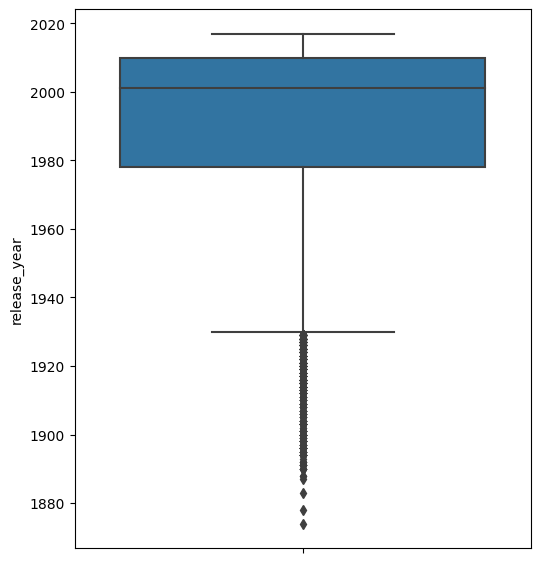

In [110]:
#Grafico de cajas

fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(131)

sns.boxplot(data=movies_db, y="release_year", ax=ax1)

Buscamos en wikipedia, y el cine arranca alrededor de 1880, por lo que consideraremos todos los resultados. Al igual que con el tiempo crearemos un rango que nosotros consideramos correcto. 

In [111]:
#Definimos la funcion que creara los rangos
def ano_de_salida(ano):
    ano = (ano.release_year)
    if ano < 1990:
        return "pelicula_muy_vieja"
    elif ano >= 1900 and ano < 2005:
        return "pelicula_vieja"
    elif ano >= 2005 and ano < 2018:
        return "nueva"
    elif ano >= 2018:
        return "muy_nueva"

El rango lo aramos en base a una consideracion propia. Muy nueva no deberia haber pero la ponemos por las dudas. 
Al igual que con el tiempo de duracion, por ahora vamos a dejar las dos columnas. Luego decidiremos cual borrar. 

In [112]:
#Creamos la nueva columna
movies_db["year_range"] = movies_db.apply(ano_de_salida, axis=1)

In [113]:
#Observamos como quedo
movies_db.head()

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,status,title,release_year,return,day,month,year_range
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",en,['Pixar Animation Studios'],['United States of America'],373554033.0,Released,Toy Story,1995,12.451801,Monday,October,pelicula_vieja
1,Jumanji,65000000.0,"['Adventure', 'Fantasy', 'Family']",en,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],262797249.0,Released,Jumanji,1995,4.043035,Friday,December,pelicula_vieja
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",en,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],0.0,Released,Grumpier Old Men,1995,NaN,Friday,December,pelicula_vieja
3,Waiting to Exhale,16000000.0,"['Comedy', 'Drama', 'Romance']",en,['Twentieth Century Fox Film Corporation'],['United States of America'],81452156.0,Released,Waiting to Exhale,1995,5.090760,Friday,December,pelicula_vieja
4,Father of the Bride Collection,0.0,['Comedy'],en,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],76578911.0,Released,Father of the Bride Part II,1995,inf,Friday,February,pelicula_vieja


Finalmente eliminaremos las columnas que no creemos necesarias para el sistema de recomendacion. 

In [114]:
#Eliminamos las columna
movies_db.drop(["status"], axis=1, inplace=True)

In [115]:
#Cambiamos el tipo de dato de las nuevas columnas
movies_db["year_range"] = movies_db["year_range"].astype("category")

In [116]:
#vemos la visualizacion final
movies_db.head(10)

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,title,release_year,return,day,month,year_range
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",en,['Pixar Animation Studios'],['United States of America'],373554033.0,Toy Story,1995,12.451801,Monday,October,pelicula_vieja
1,Jumanji,65000000.0,"['Adventure', 'Fantasy', 'Family']",en,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],262797249.0,Jumanji,1995,4.043035,Friday,December,pelicula_vieja
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",en,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],0.0,Grumpier Old Men,1995,NaN,Friday,December,pelicula_vieja
3,Waiting to Exhale,16000000.0,"['Comedy', 'Drama', 'Romance']",en,['Twentieth Century Fox Film Corporation'],['United States of America'],81452156.0,Waiting to Exhale,1995,5.090760,Friday,December,pelicula_vieja
4,Father of the Bride Collection,0.0,['Comedy'],en,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],76578911.0,Father of the Bride Part II,1995,inf,Friday,February,pelicula_vieja
5,Heat,60000000.0,"['Action', 'Crime', 'Drama', 'Thriller']",en,"['Regency Enterprises', 'Forward Pass', 'Warne...",['United States of America'],187436818.0,Heat,1995,3.123947,Friday,December,pelicula_vieja
6,Sabrina,58000000.0,"['Comedy', 'Romance']",en,"['Paramount Pictures', 'Scott Rudin Production...","['Germany', 'United States of America']",0.0,Sabrina,1995,0.000000,Friday,December,pelicula_vieja
7,Tom and Huck,0.0,"['Action', 'Adventure', 'Drama', 'Family']",en,['Walt Disney Pictures'],['United States of America'],0.0,Tom and Huck,1995,NaN,Friday,December,pelicula_vieja
8,Sudden Death,35000000.0,"['Action', 'Adventure', 'Thriller']",en,"['Universal Pictures', 'Imperial Entertainment...",['United States of America'],64350171.0,Sudden Death,1995,1.838576,Friday,December,pelicula_vieja
9,James Bond Collection,58000000.0,"['Adventure', 'Action', 'Thriller']",en,"['United Artists', 'Eon Productions']","['United Kingdom', 'United States of America']",352194034.0,GoldenEye,1995,6.072311,Thursday,November,pelicula_vieja


In [117]:
#Las ultimas metricas
movies_db.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45004 entries, 0 to 45365
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   belongs_to_collection  45004 non-null  category
 1   budget                 45004 non-null  float64 
 2   genres                 45004 non-null  category
 3   original_language      45004 non-null  category
 4   production_companies   45004 non-null  category
 5   production_countries   45004 non-null  category
 6   revenue                45004 non-null  float64 
 7   title                  45004 non-null  category
 8   release_year           45004 non-null  int64   
 9   return                 10880 non-null  float64 
 10  day                    45004 non-null  category
 11  month                  45004 non-null  category
 12  year_range             45004 non-null  category
dtypes: category(9), float64(3), int64(1)
memory usage: 6.0 MB


Vemos que surguieron problemas con la columna "revenue". Los vamos a corregir. 

In [118]:
#Cambiamos los nulos por 0
movies_db['return'].fillna(0, inplace=True)

In [119]:
#Corroboramos nulos
movies_db.isnull().sum()

belongs_to_collection    0
budget                   0
genres                   0
original_language        0
production_companies     0
production_countries     0
revenue                  0
title                    0
release_year             0
return                   0
day                      0
month                    0
year_range               0
dtype: int64

In [120]:
#Cambiamos los valores "inf" por 0, para evitar problemas futuros.
movies_db['return'].replace(np.inf, 0, inplace=True)

In [121]:
#Visualizacion final del Data Frame
movies_db.head()

,belongs_to_collection,budget,genres,original_language,production_companies,production_countries,revenue,title,release_year,return,day,month,year_range
0,Toy Story Collection,30000000.0,"['Animation', 'Comedy', 'Family']",en,['Pixar Animation Studios'],['United States of America'],373554033.0,Toy Story,1995,12.451801,Monday,October,pelicula_vieja
1,Jumanji,65000000.0,"['Adventure', 'Fantasy', 'Family']",en,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],262797249.0,Jumanji,1995,4.043035,Friday,December,pelicula_vieja
2,Grumpy Old Men Collection,0.0,"['Romance', 'Comedy']",en,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],0.0,Grumpier Old Men,1995,0.000000,Friday,December,pelicula_vieja
3,Waiting to Exhale,16000000.0,"['Comedy', 'Drama', 'Romance']",en,['Twentieth Century Fox Film Corporation'],['United States of America'],81452156.0,Waiting to Exhale,1995,5.090760,Friday,December,pelicula_vieja
4,Father of the Bride Collection,0.0,['Comedy'],en,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],76578911.0,Father of the Bride Part II,1995,0.000000,Friday,February,pelicula_vieja


In [122]:
#Exportamos
movies_db.to_csv("movies_db_mod9.cvs", index=False)